## Cluster Analysis Draft April 26

Eileen McGivney  
Science identity study  
Data: interviews with 15 7th graders  
Preprocessing: /Volumes/GoogleDrive/My Drive/Spring 2019/S435/GitHub/final-project-EileenMcGivney/April26-Preprocessing-McGivney.ipynb  

Research Question: Can we identify student profiles related to their science identity and interest through natural language processing?

Analysis: Cluster analysis
* Replicate Sherin: hierarchical agglomerative clustering
* Try other clustering methods: K-means, density based
* Estimate with regular vectors and with deviation vectors

**This Notebook**  
Sample of iterating cluster analysis on the 50-word segments as analysis as of April 26. 
* Deviation Vectors: KMEANS, Hierarchical Agglomerative Clustering, DBSCAN, NMF
* Vectors: KMEANS, Hierarchical Agglomerative Clustering, DBSCAN, NMF
* Finding- Hierarchical with 7 clusters seems the best option.


In [259]:
## Setup
import os
import re
import glob
import math
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
#nltk.download('punkt')
from collections import Counter

from collections import defaultdict
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import NMF

%cd '/Volumes/GoogleDrive/My Drive/Spring 2019/S435/GitHub/final-project-EileenMcGivney'

/Volumes/GoogleDrive/My Drive/Spring 2019/S435/GitHub/final-project-EileenMcGivney


In [260]:
## Load dataframes

# Regular vectors:
dff = pd.read_csv('./dataframes/segments_fifty.csv', index_col=0)

# Deviation vectors:
dff_dev = pd.read_csv('./dataframes/segments_fifty_deviance.csv', index_col=0)

In [261]:
## Load the vocabulary
%store -r vocabulary
print(len(vocabulary))

992


## Clustering Deviance Vectors

## **KMeans: inertia and KMeans clustering**

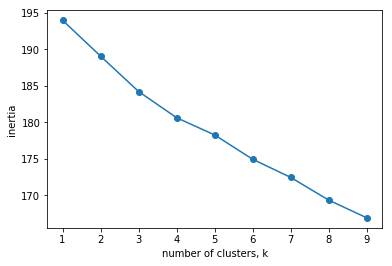

In [262]:
# Inertia values and plot
ks = list(range(1, 10))
inertias = []

for k in ks:
    
    # Create a KMeans instance with k clusters: model
    kmeans = KMeans(n_clusters=k, max_iter=1000)
    
    # Fit model to samples
    kmeans.fit(dff_dev.values)
    
    # Append the inertia to the list of inertias
    inertias.append(kmeans.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

### *This isn't helpful to identify the number of clusters: attempt 7, 5 and 3 to see if they make sense*

In [11]:
## k=7 Kmeans clustering:  print the first 10 words that are the most associated with each cluster centroids

kmeans_obj = KMeans(n_clusters=7, max_iter=1000).fit(dff_dev.values)

n_words = 10
top_words = collections.defaultdict(lambda: [])

# iterate through each cluster
for n in range(kmeans_obj.n_clusters):

    print('CLUSTER ' + str(n+1) + ': ', end='')

    # get the cluster centers
    arr = kmeans_obj.cluster_centers_[n]

    # sorts the array and keep the last n words
    indices = arr.argsort()[-n_words:]

    # add the words to the list of words
    for i in indices:
        print(vocabulary[i], end=', ')
        top_words[n].append(vocabulary[i])
        
    print('')

NameError: name 'KMeans' is not defined

In [264]:
## k=5 Kmeans clustering:  print the first 10 words that are the most associated with each cluster centroids

kmeans_obj = KMeans(n_clusters=5, max_iter=1000).fit(dff_dev.values)

n_words = 10
top_words = collections.defaultdict(lambda: [])

# iterate through each cluster
for n in range(kmeans_obj.n_clusters):

    print('CLUSTER ' + str(n+1) + ': ', end='')

    # get the cluster centers
    arr = kmeans_obj.cluster_centers_[n]

    # sorts the array and keep the last n words
    indices = arr.argsort()[-n_words:]

    # add the words to the list of words
    for i in indices:
        print(vocabulary[i], end=', ')
        top_words[n].append(vocabulary[i])
        
    print('')

CLUSTER 1: affect, try, parts, everything, first, able, living, they, things, think, 
CLUSTER 2: thought, even, fun, definitely, always, went, go, time, liked, things, 
CLUSTER 3: hypotheses, would, actually, figure, know, test, world, take, real, different, 
CLUSTER 4: find, experiments, look, oxygen, around, put, dissolved, died, see, fish, 
CLUSTER 5: much, good, my, job, probably, could, want, know, they, science, 


In [265]:
## k=3 Kmeans clustering:  print the first 10 words that are the most associated with each cluster centroids

kmeans_obj = KMeans(n_clusters=3, max_iter=1000).fit(dff_dev.values)

n_words = 10
top_words = collections.defaultdict(lambda: [])

# iterate through each cluster
for n in range(kmeans_obj.n_clusters):

    print('CLUSTER ' + str(n+1) + ': ', end='')

    # get the cluster centers
    arr = kmeans_obj.cluster_centers_[n]

    # sorts the array and keep the last n words
    indices = arr.argsort()[-n_words:]

    # add the words to the list of words
    for i in indices:
        print(vocabulary[i], end=', ')
        top_words[n].append(vocabulary[i])
        
    print('')

CLUSTER 1: probably, could, good, much, something, always, my, didn, science, know, 
CLUSTER 2: first, affect, living, everything, parts, many, able, different, think, things, 
CLUSTER 3: lab, ecoxpt, go, water, died, around, make, experiments, see, fish, 


### *These clusters look good some of the time, especially the 5-cluster solution. But it changes every time you run it so is not sufficiently reliable*

## **Hierarchical clustering**

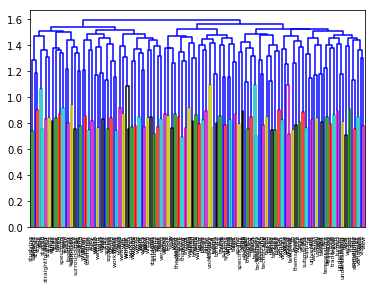

In [266]:
## Plot a dendrogram

# Calculate the linkage: mergings
mergings = linkage(dff_dev.values, method='complete', )

# Plot the dendrogram
dendrogram(mergings,
           labels=dff_dev.columns,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

### *This isn't super clear but generally looks like the cluster up to having a cluster for each transcript, but maybe 5-7 clusters would work*

In [12]:
## Using agglomerative clustering: 7 clusters
ward = AgglomerativeClustering(n_clusters=7, linkage='ward').fit(dff_dev.values)
label = ward.labels_

print("Number of points: %i" % label.size)

clf = NearestCentroid()
clf.fit(dff_dev.values, label)

print(clf.centroids_.shape)

NameError: name 'AgglomerativeClustering' is not defined

In [303]:
#print the top 10 words for each cluster centroid
def visualize_clusters(df, n_clusters, centroids, n_words=10, printed=True):   
    # try to get the most informative words of each cluster
    words = {}
    vocabulary = df.columns
    for n in range(n_clusters):
        words[n] = []
        if printed: print('CLUSTER ' + str(n+1) + ': ', end='')
        arr = centroids[n]
        indices = arr.argsort()[-n_words:]
        for i in indices:
            if printed: print(vocabulary[i], end=', '),
            words[n].append(vocabulary[i])
        print('')
    return words

top_words = visualize_clusters(dff_dev, clf.centroids_.shape[0], clf.centroids_)

CLUSTER 1: kids, hands, science, much, could, figure, problem, think, since, different, 
CLUSTER 2: science, know, would, see, find, could, different, things, they, think, 
CLUSTER 3: bees, could, went, interested, thought, able, time, go, things, different, 
CLUSTER 4: nonliving, bit, learning, able, use, me, interesting, different, things, think, 
CLUSTER 5: figure, science, different, think, they, something, things, my, didn, know, 
CLUSTER 6: cause, beyond, investigate, around, find, look, died, things, guess, fish, 
CLUSTER 7: example, me, science, confusing, category, something, different, would, teacher, topic, 


### *These clusters kind of make sense- not completely but kind of?*

**TSNE**

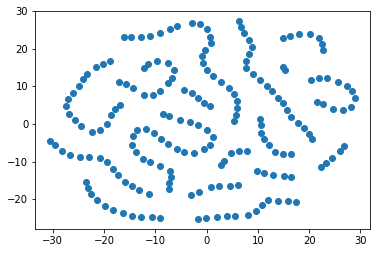

In [269]:

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(dff_dev.values)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs,ys)
plt.show()

### *This is not promising: there are no real clusters*

**DBSCAN: I couldn't get the optimal epsilon and samples in this iteration, in others it clustered into just 2**

In [10]:
# #apply DBScan 
# dbscan = DBSCAN(eps=4, min_samples=10).fit(dff_dev.values)

# labels = dbscan.labels_

# print("Number of points: %i" % labels.size)

# #find the cluster centroid (using the code from above)
# clf = NearestCentroid()
# clf.fit(dff_dev.values, labels)

# print(clf.centroids_.shape)

In [271]:
# top_words = visualize_clusters(dff_dev, clf.centroids_.shape[0], clf.centroids_)

**NMF**

In [272]:
# Transform data so not negative:
scaler = MinMaxScaler()
dff_dev[dff_dev.columns] = scaler.fit_transform(dff_dev[dff_dev.columns])

# Create an NMF instance: model
model = NMF(n_components=4)

# Fit the model to articles
model.fit(dff_dev.values)

# Transform the articles: nmf_features
nmf_features = model.transform(dff_dev.values)

# Print the NMF features
print(nmf_features[:4])

[[0.11452188 0.42157938 0.0621011  0.18196752]
 [0.13533324 0.3803992  0.02181112 0.19912271]
 [0.19471038 0.32220591 0.04676859 0.1719988 ]
 [0.24911441 0.29682701 0.06932017 0.10704898]]


In [273]:
import pandas as pd

# Create a DataFrame: components_df
components_dff_dev = pd.DataFrame(model.components_, columns=dff_dev.columns)

for i in range(4):

    # Select row : component
    component = components_dff_dev.iloc[i,:]

    # Print result of nlargest
    print(component.nlargest(n=10), '\n')

think        1.188287
things       1.033536
different    0.975333
they         0.690760
able         0.542403
me           0.504855
might        0.500804
parts        0.485237
bit          0.480349
helped       0.476845
Name: 0, dtype: float64 

fish      0.651443
find      0.560625
would     0.550007
around    0.529980
see       0.520814
water     0.493040
lab       0.472305
put       0.453505
didn      0.451513
go        0.435628
Name: 1, dtype: float64 

know         0.614943
figure       0.534498
they         0.510189
science      0.499206
something    0.494293
much         0.484706
good         0.469177
my           0.454236
math         0.423927
answers      0.405890
Name: 2, dtype: float64 

could         0.501246
interested    0.482180
animals       0.479343
thought       0.476285
definitely    0.460349
time          0.455764
go            0.449922
deep          0.445727
always        0.416721
things        0.416626
Name: 3, dtype: float64 



### *These are kind of interesting because they use the terms related to "me" and "them" a bit more*

## Clustering Regular Vectors

### *These are pretty similar but less interpretable so I'm not commenting on the results below. I decided to stick with the deviation vectors*

**KMeans: inertia and KMeans clustering**

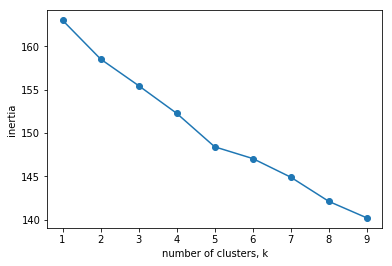

In [274]:
# Inertia values and plot
ks = list(range(1, 10))
inertias = []

for k in ks:
    
    # Create a KMeans instance with k clusters: model
    kmeans = KMeans(n_clusters=k, max_iter=1000)
    
    # Fit model to samples
    kmeans.fit(dff.values)
    
    # Append the inertia to the list of inertias
    inertias.append(kmeans.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [298]:
## k=10 Kmeans clustering:  print the first 10 words that are the most associated with each cluster centroids

kmeans_obj = KMeans(n_clusters=7, max_iter=1000).fit(dff.values)

n_words = 10
top_words = collections.defaultdict(lambda: [])

# iterate through each cluster
for n in range(kmeans_obj.n_clusters):

    print('CLUSTER ' + str(n+1) + ': ', end='')

    # get the cluster centers
    arr = kmeans_obj.cluster_centers_[n]

    # sorts the array and keep the last n words
    indices = arr.argsort()[-n_words:]

    # add the words to the list of words
    for i in indices:
        print(vocabulary[i], end=', ')
        top_words[n].append(vocabulary[i])
        
    print('')

CLUSTER 1: know, learning, life, things, wasn, real, would, think, different, ecoxpt, 
CLUSTER 2: try, science, something, didn, know, could, different, things, think, they, 
CLUSTER 3: would, think, much, could, my, favorite, rock, me, science, animals, 
CLUSTER 4: levels, lower, using, select, open, guesses, problem, much, figure, options, 
CLUSTER 5: show, kinda, dissolved, big, oxygen, different, lead, problem, ways, bigger, 
CLUSTER 6: iq, willing, pursue, pesticides, safe, week, reaction, delayed, weeks, nothing, 
CLUSTER 7: think, thing, they, didn, find, my, things, dissolved, oxygen, fish, 


In [276]:
## k=5 Kmeans clustering:  print the first 10 words that are the most associated with each cluster centroids

kmeans_obj = KMeans(n_clusters=5, max_iter=1000).fit(dff.values)

n_words = 10
top_words = collections.defaultdict(lambda: [])

# iterate through each cluster
for n in range(kmeans_obj.n_clusters):

    print('CLUSTER ' + str(n+1) + ': ', end='')

    # get the cluster centers
    arr = kmeans_obj.cluster_centers_[n]

    # sorts the array and keep the last n words
    indices = arr.argsort()[-n_words:]

    # add the words to the list of words
    for i in indices:
        print(vocabulary[i], end=', ')
        top_words[n].append(vocabulary[i])
        
    print('')

CLUSTER 1: think, my, time, see, fun, thought, would, things, could, go, 
CLUSTER 2: me, see, experiments, would, look, science, different, things, they, think, 
CLUSTER 3: since, much, hard, different, someone, know, get, something, my, go, 
CLUSTER 4: died, look, would, think, they, find, dissolved, oxygen, things, fish, 
CLUSTER 5: try, things, want, didn, my, could, think, know, science, they, 


In [277]:
## k=3 Kmeans clustering:  print the first 10 words that are the most associated with each cluster centroids

kmeans_obj = KMeans(n_clusters=3, max_iter=1000).fit(dff.values)

n_words = 10
top_words = collections.defaultdict(lambda: [])

# iterate through each cluster
for n in range(kmeans_obj.n_clusters):

    print('CLUSTER ' + str(n+1) + ': ', end='')

    # get the cluster centers
    arr = kmeans_obj.cluster_centers_[n]

    # sorts the array and keep the last n words
    indices = arr.argsort()[-n_words:]

    # add the words to the list of words
    for i in indices:
        print(vocabulary[i], end=', ')
        top_words[n].append(vocabulary[i])
        
    print('')

CLUSTER 1: thought, didn, find, see, think, could, would, go, fish, things, 
CLUSTER 2: scientists, could, experiments, able, look, see, they, things, think, different, 
CLUSTER 3: could, would, didn, something, things, my, think, science, know, they, 


**Hierarchical clustering**

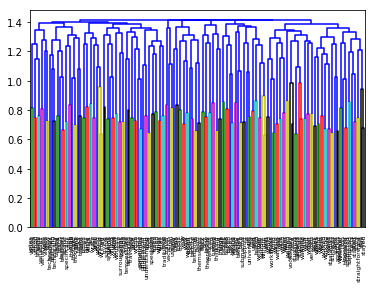

In [278]:
## Plot a dendrogram

# Calculate the linkage: mergings
mergings = linkage(dff.values, method='complete', )

# Plot the dendrogram
dendrogram(mergings,
           labels=dff.columns,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

In [299]:
## Using agglomerative clustering
ward = AgglomerativeClustering(n_clusters=7, linkage='ward').fit(dff.values)
label = ward.labels_

print("Number of points: %i" % label.size)

clf = NearestCentroid()
clf.fit(dff.values, label)

print(clf.centroids_.shape)

Number of points: 194
(7, 992)


In [300]:
#print the top 10 words for each cluster centroid
def visualize_clusters(df, n_clusters, centroids, n_words=10, printed=True):   
    # try to get the most informative words of each cluster
    words = {}
    vocabulary = df.columns
    for n in range(n_clusters):
        words[n] = []
        if printed: print('CLUSTER ' + str(n+1) + ': ', end='')
        arr = centroids[n]
        indices = arr.argsort()[-n_words:]
        for i in indices:
            if printed: print(vocabulary[i], end=', '),
            words[n].append(vocabulary[i])
        print('')
    return words

top_words = visualize_clusters(dff, clf.centroids_.shape[0], clf.centroids_)

CLUSTER 1: ways, think, sewage, hands, much, kids, figure, problem, different, since, 
CLUSTER 2: know, fun, would, see, find, different, could, things, think, they, 
CLUSTER 3: bees, interested, able, definitely, things, helped, go, thought, time, different, 
CLUSTER 4: answers, hurting, figure, person, things, something, they, my, didn, know, 
CLUSTER 5: different, nonliving, bit, learning, able, use, me, interesting, things, think, 
CLUSTER 6: dying, around, cause, investigate, beyond, look, things, died, guess, fish, 
CLUSTER 7: me, rocks, example, next, something, would, confusing, category, teacher, topic, 


**TSNE**

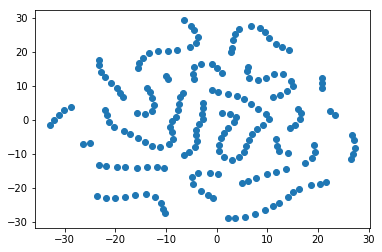

In [281]:

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(dff.values)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs,ys)
plt.show()

**DBSCAN**

In [282]:
# #apply DBScan 
# dbscan = DBSCAN(eps=5, min_samples=5).fit(dff.values)

# labels = dbscan.labels_

# print("Number of points: %i" % labels.size)

# #find the cluster centroid (using the code from above)
# clf = NearestCentroid()
# clf.fit(dff.values, labels)

# print(clf.centroids_.shape)

In [283]:
# top_words = visualize_clusters(dff, clf.centroids_.shape[0], clf.centroids_)

**NMF**

In [284]:
# Transform data so not negative:
scaler = MinMaxScaler()
dff[dff.columns] = scaler.fit_transform(dff[dff.columns])

# Create an NMF instance: model
model = NMF(n_components=5)

# Fit the model to articles
model.fit(dff.values)

# Transform the articles: nmf_features
nmf_features = model.transform(dff.values)

# Print the NMF features
print(nmf_features[:5])

[[0.24318301 0.16074178 0.         0.16115383 0.        ]
 [0.27202318 0.1322698  0.         0.144998   0.00558705]
 [0.3096592  0.06009936 0.00219772 0.10194342 0.        ]
 [0.28479991 0.03660239 0.         0.04775835 0.00657149]
 [0.36893578 0.         0.         0.         0.        ]]


In [285]:
import pandas as pd

# Create a DataFrame: components_df
components_dff = pd.DataFrame(model.components_, columns=dff.columns)

for i in range(5):

    # Select row : component
    component = components_dff.iloc[i,:]

    # Print result of nlargest
    print(component.nlargest(n=10), '\n')

think          1.477307
things         1.241574
they           1.230451
different      0.955947
find           0.686086
look           0.624150
experiments    0.595233
know           0.582607
try            0.558706
could          0.517662
Name: 0, dtype: float64 

confusing    0.572490
topic        0.561397
put          0.558977
map          0.534544
concept      0.519119
hard         0.477726
see          0.453830
would        0.445862
write        0.439100
sometimes    0.437417
Name: 1, dtype: float64 

figure       0.632825
know         0.572548
much         0.549474
answers      0.488706
kids         0.474442
something    0.468022
since        0.463197
good         0.442814
they         0.440303
science      0.433940
Name: 2, dtype: float64 

able         0.528981
time         0.528135
go           0.513751
things       0.465059
take         0.439851
systems      0.435791
different    0.420779
bees         0.394305
thought      0.381943
happened     0.363746
Name: 3, dtype: float6